# Analyze the willingness of people to switch to biking.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import os

if 'WB' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'WB/PD_COMAP/scenarios/'
destination_folder_path = data_folder + 'WB/PD_COMAP/scenarios/'

merge = pd.read_csv(data_folder + 'WB/PD_COMAP/matrices_time_distance/merged_matrix.csv')
merge.head()

In [15]:
# Define willingness question columns

debit_card = 'Ciclista - 34. Você usaria bicicleta se recebesse créditos monetários em forma de cartão de débito'
goods_services = 'Ciclista - 35. Você usaria mais a bicicleta se recebesse créditos monetários para a troca de bens e serviços'
public_services = 'Ciclista - 36. Você usaria mais a bicicleta se recebesse créditos em contrapartidas por serviços públicos'
bank_account = 'Ciclista - 37. Você usaria mais a bicicleta se recebesse créditos que pudessem ser transferidos para a sua conta bancária/poupança'
transfer_pass = 'Ciclista - 38. Você usaria mais a bicicleta se recebesse créditos no Bilhete Único de transporte'
medicines = 'Ciclista - 39. Você usaria mais a bicicleta se recebesse créditos para compra de medicamentos'

dict_rename_columns = {debit_card: 'Debit card',
                       goods_services: 'Goods and Services',
                       public_services: 'Public services',
                       bank_account: 'Bank account',
                       transfer_pass: 'Transfer Pass',
                       medicines: 'Medicines'}

columns = [debit_card, goods_services, public_services, bank_account, transfer_pass, medicines]

In [3]:
for column in columns:
    print(merge[column].unique())

['4.' '5. Concordo totalmente' '1. Discordo totalmente' '2.' '3.']
['2.' '5. Concordo totalmente' '3.' '1. Discordo totalmente' '4.']
['1. Discordo totalmente' '5. Concordo totalmente' '3.' '4.' '2.']
['4.' '5. Concordo totalmente' '3.' '1. Discordo totalmente' '2.']
['3.' '5. Concordo totalmente' '4.' '2.' '1. Discordo totalmente']
['3.' '5. Concordo totalmente' '1. Discordo totalmente' '4.' '2.']


In [4]:
for value in merge[column].unique():
    print(type(value))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
from matplotlib import pyplot as plt

column = debit_card

dict = {'1. Discordo totalmente': 1,
        '2.': 2,
        '3.': 3,
        '4.': 4,
        '5. Concordo totalmente': 5,}

for column in columns:
        merge[column] = merge[column].map(dict)  

In [6]:
merge.head()

,Ciclista - 1. Qual a sua idade?,Ciclista - 1. Qual a sua idade? (Faixa etária),Ciclista - 2. Com qual gênero você se identifica?,Ciclista - 3. Qual a sua renda familiar?,Ciclista - 4. Banheiro,Ciclista - 5. Empregado doméstico,Ciclista - 6. Automóvel,Ciclista - 7. Microcomputador,Ciclista - 8. Lava louça,Ciclista - 9. Geladeira,Ciclista - 10. Freezer,Ciclista - 11. Lava roupa,Ciclista - 12. DVD,Ciclista - 13. Microondas,Ciclista - 14. Motocicleta,Ciclista - 15. Secadora de roupas,Ciclista - 16. Sua residência possui água encanada?,Ciclista - 17. Sua residência possui rua pavimentada?,Ciclista - 18. Qual o seu grau de instrução atual?,Ciclista - Critério Brasil - Pontos,Ciclista - Critério Brasil - Classe,Ciclista - Ciclista - Critério Brasil - Classificação equivalente,Ciclista - 3. Qual a sua renda familiar? (2),Ciclista – Classe da renda familiar,Ciclista - 19. Com qual cor ou raça você se identifica?,"Ciclista - 20. Qual a quantidade de pessoas que moram na sua residência? (Caso more sozinho, assinalar valor igual a 01)",Ciclista - 21. Quantos veículos motorizados (Automóvel/Motocicleta) estão disponíveis na sua residência?,Ciclista - 22. Quantas bicicletas estão disponíveis na sua residência?,Ciclista - 23. Qual o bairro onde você reside?,Ciclista - 23. Qual o bairro onde você reside? (Area Metro),Ciclista - 23. Qual o bairro onde você reside? (Area SPTrans),Ciclista - 24. Qual a sua condição (ocupação) de atividade atual?,Ciclista - 25. Quantas vezes você costumava se deslocar por semana (de segunda a sexta-feira) antes da pandemia?,Ciclista - 26. Qual o principal motivo dos seus deslocamentos antes da pandemia?,Ciclista - 26.1 Qual o bairro onde você realizava essa atividade antes da pandemia?,Ciclista - 26.1 Qual o bairro onde você realizava essa atividade antes da pandemia? (Area Metro),Ciclista - 26.1 Qual o bairro onde você realizava essa atividade antes da pandemia? (Area SPTrans),"Ciclista - 27. Quanto tempo, em média, você costumava gastar para chegar à atividade principal indicada no item 12? (Hora)","Ciclista - 27. Quanto tempo, em média, você costumava gastar para chegar à atividade principal indicada no item 12? (Minuto)","Ciclista - 28. Para realizar a atividade indicada no item 12, quantos meios de transporte você costumava utilizar?",Ciclista - 29. Qual o meio de transporte você costumava utilizar para realizar a atividade indicada no item 12 antes da pandemia?,Ciclista - 30. (Modo de transporte principal),30. Quais os meios de transporte você costumava utilizar em uma única viagem para realizar a atividade indicada no item 11 antes da pandemia? - Seleção 1,30. Quais os meios de transporte você costumava utilizar em uma única viagem para realizar a atividade indicada no item 11 antes da pandemia? - Seleção 2,Ciclista - 31. Quanto você costumava pagar para utilizar esse(s) meio(s) de transporte?,Ciclista - 32. Qual o valor médio que você costumava pagar de estacionamento?,Ciclista - 33. Qual o valor médio que você costumava pagar?,Ciclista - PD Cenário 1 (Ficha 1 - Tipo de ficha),Ciclista - PD Cenário 1 (Ficha 1 - Selecionado),Ciclista - PD Cenário 1 (Ficha 1 - Tempo de viagem (min)),Ciclista - PD Cenário 1 (Ficha 1 - Tempo de Acesso (min)),Ciclista - PD Cenário 1 (Ficha 1 - Tempo de Egresso (min)),Ciclista - PD Cenário 1 (Ficha 1 - Custo (R$)),Ciclista - PD Cenário 1 (Ficha 1 - Presenca de infraestrutura cicloviária),Ciclista - PD Cenário 1 (Ficha 1 - Remuneracao Bike SP),Ciclista - PD Cenário 1 (Ficha 1 - Estacionamento de bicicleta),Ciclista - PD Cenário 1 (Ficha 1 - Facilidades no destino),Ciclista - PD Cenário 1 (Ficha 2 - Tipo de ficha),Ciclista - PD Cenário 1 (Ficha 2 - Selecionado),Ciclista - PD Cenário 1 (Ficha 2 - Tempo de viagem (min)),Ciclista - PD Cenário 1 (Ficha 2 - Tempo de Acesso (min)),Ciclista - PD Cenário 1 (Ficha 2 - Tempo de Egresso (min)),Ciclista - PD Cenário 1 (Ficha 2 - Custo (R$)),Ciclista - PD Cenário 1 (Ficha 2 - Presenca de infraestrutura cicloviária),Ciclista - PD Cenário 1 (F

# Analysis of willingness to change to bike, given monetary credits

In [ ]:
import matplotlib.pyplot as plt

column = debit_card

def plot_pie(data, title = '', y_label = ''):
    fig = plt.figure(figsize=(3,3), dpi=200)
    fig.patch.set_facecolor('white')

    ax = plt.subplot(111)

    data.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=6)

    ax.set_title(title, fontsize = 10)
    if y_label != '':
        ax.set_ylabel(y_label, fontsize = 10)

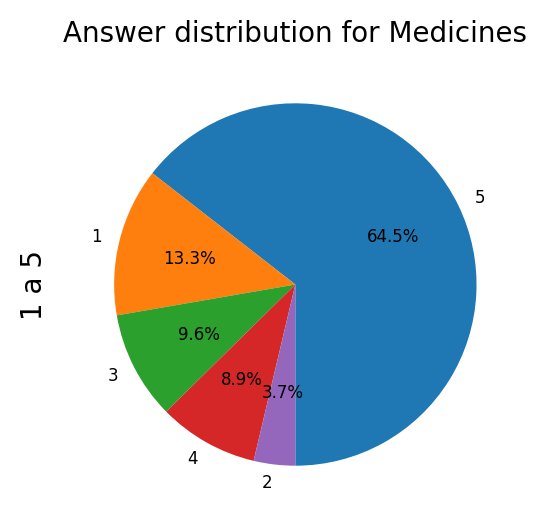

In [20]:
plot_pie(merge[column], 'Answer distribution for ' + dict_rename_columns[column], '1 a 5')

In [9]:
colors_list = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']

def plot_pie_chart(data, ax, variable, boolean_variable = False):
    variable_string = dict_rename_columns[variable]
    data_filter = data[variable]
    data_plot = data_filter.value_counts()
   
    colors=colors_list
    data_plot.plot(ax=ax, kind='pie', autopct='%1.1f%%', startangle=0,fontsize = 15, colors=colors)
    ax.set_title('For variable ' + variable_string, fontsize = 15)
    ax.set_ylabel("")
    return ax

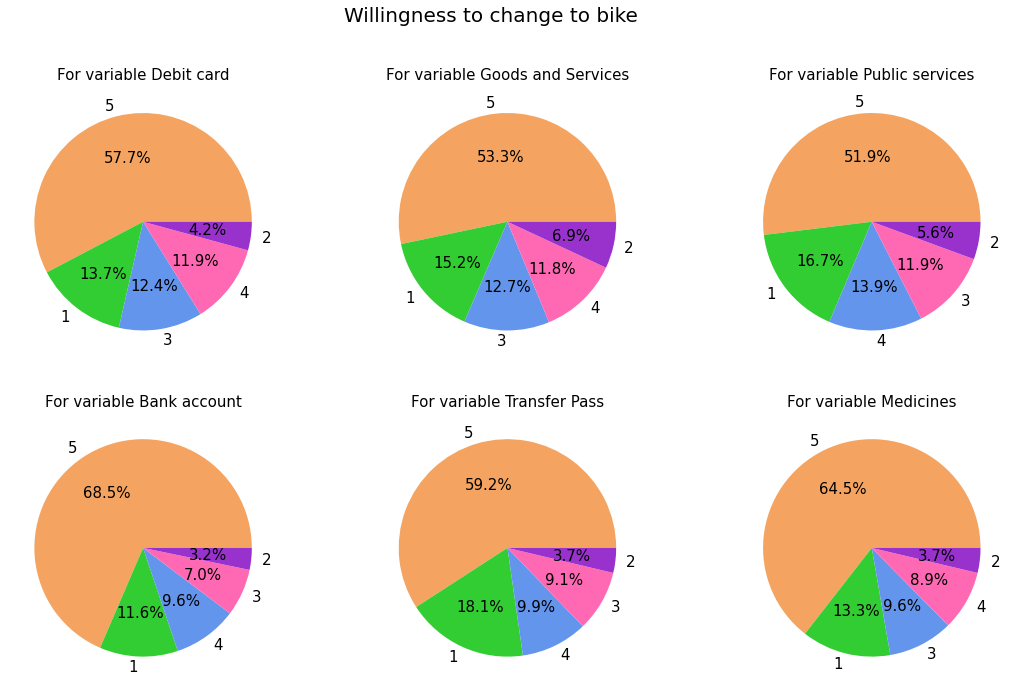

In [17]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
nrow=2
ncol=3

fig, axes = plt.subplots(nrow, ncol)

fig.patch.set_facecolor('white')
fig.set_size_inches(18.5, 11)

fig.suptitle('Willingness to change to bike', fontsize = 20)

# key of social class
i = 0

for r in range(nrow):
    for c in range(ncol):
        column = columns[i]
        axes[r,c] = plot_pie_chart(merge, axes[r,c], column)
        i+=1

In [ ]:
## TO DO: sum 4 and 5 (agrees) and 1 and 2 (disagrees) and them compare 